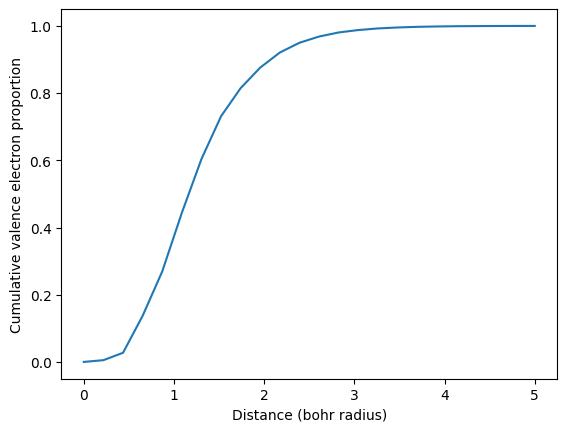

In [2]:
import numpy as np
import matplotlib.pyplot as plt
text = open("/path/to/n_ii_6548_6583_run.txt").read()
no_valence_electrons = 4
runs = text.split("Analyzing output file...")
x = [1e-06]
y = []
for item in runs:
    res = item.split("\n")[1]
    if "R" not in res:
        y.append(float(res))
    try:
        size = item.split("\n")[2].split("ratsph ")[-1]
        if len(size) > 0:
            x.append(float(size))
    except IndexError:
        pass
x = np.array(x)
y = np.array(y)
y = y / no_valence_electrons
plt.plot(x, y)
plt.xlabel("Distance (bohr radius)")
plt.ylabel("Cumulative valence electron proportion")
plt.show()

In [4]:
from scipy import interpolate
f_interp = interpolate.interp1d(y, x, kind='linear', fill_value='extrapolate')
# Find radius at 90% electron proportion
target_y = 2.8 / 4
radius_90 = f_interp(target_y)
print(radius_90)

1.4686761599465123
